In [1]:
% some housekeeping stuff
%register_graphics_toolkit ("gnuplot");
%available_graphics_toolkits ();
%graphics_toolkit ("plotly")
graphics_toolkit ("notebook")
clear
% end of housekeeping

# Biotic Ligand Model

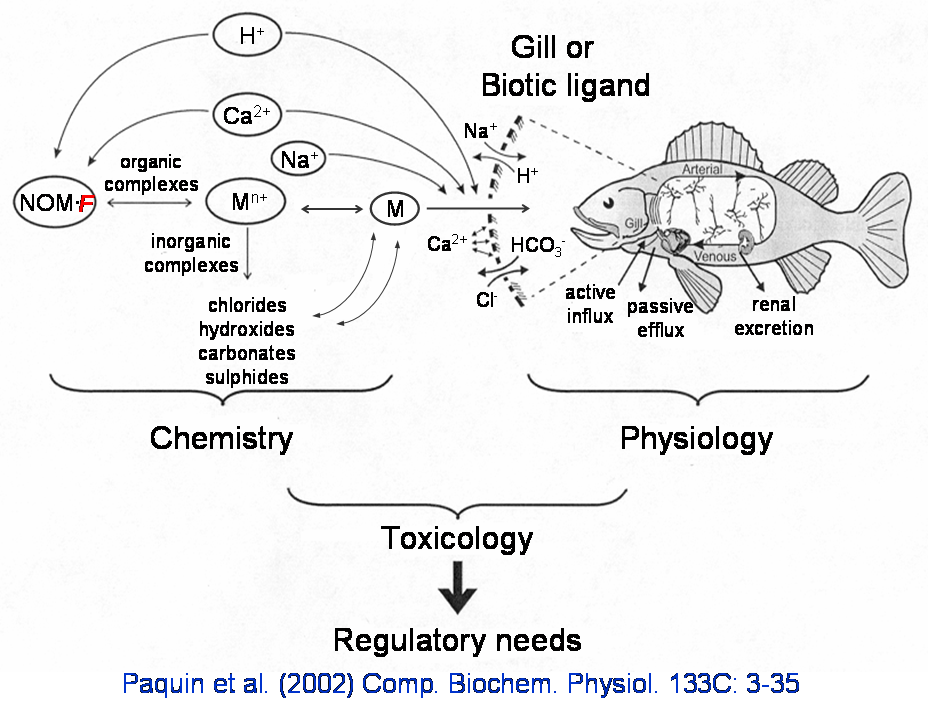


# Simple BLM



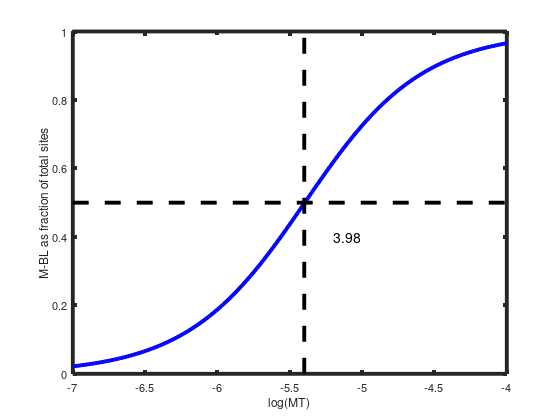

In [5]:
%plot -s 600,500 -f 'svg'
logMT=-7:0.01:-4; MT=10.^logMT; LT=1e-6;

for i=1:length(logMT)

pH=5;

TABLEAU=[...
%H   M     L     logK  species
1    0     0     0     %H
0    1     0     0     %M
0    0     1     0     %L
-1   0     0     -14   %OH
1    0     1     5.4   %HL
0    1     1     6     %ML
0    MT(i) LT  0     %TOTALS (first entry not actually here used because pH is fixed)
];

[N,M]=size(TABLEAU);
ASOLUTION=TABLEAU(1:N-1,1:M-1);
KSOLUTION=TABLEAU(1:N-1,M);
T=TABLEAU(N,2:M-1);T(T==0)=1e-30; T=T';

% fixed pH

[Ksolution,Asolution]=get_equilib_fixed_pH(KSOLUTION,ASOLUTION,pH);
X=T./10; [xans,masserr,J,C] = nl_massbalancerrnosolid_NR(X,Asolution,Ksolution,T);

ML(i)=C(6)./LT;

end

[val,idx]=min(abs(ML-0.5)); MT50=MT(idx);

plot(logMT,ML,'b-','linewidth',2); xlabel('log(MT)'); ylabel('M-BL as fraction of total sites')
set(gca,'linewidth',2,'fontsize',11)
hold on
axis([min(logMT) max(logMT) 0 1])
plot([min(logMT) max(logMT)], [0.5 0.5],'k--','linewidth',2)
plot([log10(MT50) log10(MT50)],[0 1],'k--','linewidth',2)
MT50str=num2str(MT50*1e6);
text(log10(MT50)+0.2,0.4,MT50str(1:4),'fontsize',14)


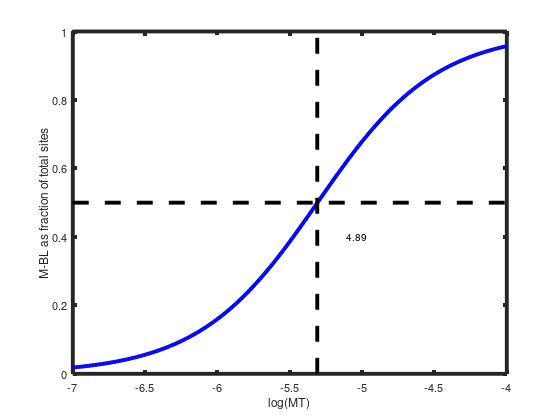

In [3]:
%plot -s 600,500 -f 'svg'
logMT=-7:0.01:-4; MT=10.^logMT; LT=1e-6; CaT=1e-3;

for i=1:length(logMT)

pH=6;

TABLEAU=[...
%H   M     L    Ca logK  species
1    0     0    0   0     %H
0    1     0    0   0     %M
0    0     1    0   0     %L
0    0     0    1   0     %Ca
-1   0     0    0   -14   %OH
1    0     1    0   5.4   %HL
0    1     1    0   6     %ML
0    0     1    1   3.5   %CaL
0    MT(i) LT   CaT   0     %TOTALS (first entry not actually here used because pH is fixed)
];

[N,M]=size(TABLEAU);
ASOLUTION=TABLEAU(1:N-1,1:M-1);
KSOLUTION=TABLEAU(1:N-1,M);
T=TABLEAU(N,2:M-1);T(T==0)=1e-30; T=T';

% fixed pH

[Ksolution,Asolution]=get_equilib_fixed_pH(KSOLUTION,ASOLUTION,pH);
X=T./10; [xans,masserr,J,C] = nl_massbalancerrnosolid_NR(X,Asolution,Ksolution,T);

ML(i)=C(7)./LT;

end

[val,idx]=min(abs(ML-0.5)); MT50=MT(idx);

plot(logMT,ML,'b-','linewidth',2); xlabel('log(MT)'); ylabel('M-BL as fraction of total sites')
set(gca,'linewidth',2,'fontsize',11)
hold on
axis([min(logMT) max(logMT) 0 1])
plot([min(logMT) max(logMT)], [0.5 0.5],'k--','linewidth',2)
plot([log10(MT50) log10(MT50)],[0 1],'k--','linewidth',2)
MT50str=num2str(MT50*1e6);
text(log10(MT50)+0.2,0.4,MT50str(1:4),'fontsize',14)



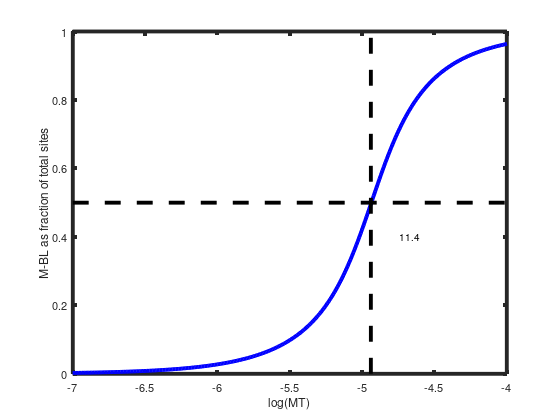

In [4]:
%plot -s 600,500 -f 'svg'
logMT=-7:0.01:-4; MT=10.^logMT; LT=1e-6; CaT=3e-3; NOMT=10*LT;

for i=1:length(logMT)

pH=6;

TABLEAU=[...
%H   M     L    Ca  NOM   logK  species
1    0     0    0   0      0     %H
0    1     0    0   0      0     %M
0    0     1    0   0      0     %L
0    0     0    1   0      0     %Ca
0    0     0    0   1      0     %NOM
-1   0     0    0   0     -14    %OH
1    0     1    0   0      4.5   %HL
0    1     1    0   0      6.5   %ML
0    0     1    1   0      3.5   %CaL
1    0     0    0   1      4.0   %HNOM
0    1     0    0   1      7.5   %MNOM
0    0     0    1   1      4     %CaNOM
-1   1     0    0   0      -8.0  %CuOH
0    MT(i) LT   CaT NOMT   0     %TOTALS (first entry not actually here used because pH is fixed)
];

[N,M]=size(TABLEAU);
ASOLUTION=TABLEAU(1:N-1,1:M-1);
KSOLUTION=TABLEAU(1:N-1,M);
T=TABLEAU(N,2:M-1);T(T==0)=1e-30; T=T';

% fixed pH

[Ksolution,Asolution]=get_equilib_fixed_pH(KSOLUTION,ASOLUTION,pH);
X=T./10; [xans,masserr,J,C] = nl_massbalancerrnosolid_NR(X,Asolution,Ksolution,T);

ML(i)=C(8)./LT;

end

[val,idx]=min(abs(ML-0.5)); MT50=MT(idx);

plot(logMT,ML,'b-','linewidth',2); xlabel('log(MT)'); ylabel('M-BL as fraction of total sites')
set(gca,'linewidth',2,'fontsize',11)
hold on
axis([min(logMT) max(logMT) 0 1])
plot([min(logMT) max(logMT)], [0.5 0.5],'k--','linewidth',2)
plot([log10(MT50) log10(MT50)],[0 1],'k--','linewidth',2)
MT50str=num2str(MT50*1e6);
text(log10(MT50)+0.2,0.4,MT50str(1:4),'fontsize',14)

